In [1]:

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
 #       print(os.path.join(dirname, filename))



# Importing Libraries 

In [93]:
#pip install catboost

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler  
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.multioutput import MultiOutputClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, roc_auc_score
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from matplotlib.colors import ListedColormap


import warnings
warnings.filterwarnings("ignore")



# Overview of the Dataset 

In [118]:
#Reading the dataset and loading it in data frame 

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
submission_df = pd.read_csv('sample_submission.csv')

print ('Train dataframe')
display(train_df)
print ('Test dataframe')
display(test_df)

Train dataframe


,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,...,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,...,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,...,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,3,781,789,3353146,3353173,210,16,29,3202,114,...,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,4,1540,1560,618457,618502,521,72,67,48231,82,...,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19214,19214,749,757,143210,143219,17,4,4,2193,122,...,-0.1429,0.0044,0.2901,0,0,0,1,0,0,0
19215,19215,723,735,2488529,2488541,231,17,26,27135,104,...,0.7222,-0.0989,0.5378,0,0,0,0,0,0,1
19216,19216,6,31,1578055,1578129,780,114,98,71112,41,...,0.7719,-0.4283,0.9997,1,0,0,0,0,0,0
19217,19217,9,18,1713172,1713184,126,13,26,14808,88,...,0.9610,-0.1162,0.3509,0,0,0,0,0,0,1


Test dataframe


,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,19219,1015,1033,3826564,3826588,659,23,46,62357,67,...,0.0095,0.5652,1.0000,1.0,2.8410,1.1139,1.6628,0.6727,-0.2261,0.9172
1,19220,1257,1271,419960,419973,370,26,28,39293,92,...,0.0047,0.2414,1.0000,1.0,2.5682,0.9031,1.4472,0.9063,-0.1453,0.9104
2,19221,1358,1372,117715,117724,289,36,32,29386,101,...,0.0155,0.6000,0.7500,0.0,2.4609,1.3222,1.3222,-0.5238,-0.0435,0.6514
3,19222,158,168,232415,232440,80,10,11,8586,107,...,0.0037,0.8000,1.0000,1.0,1.9031,0.6990,1.0414,0.1818,-0.0738,0.2051
4,19223,559,592,544375,544389,140,19,15,15524,103,...,0.0158,0.8421,0.5333,0.0,2.1461,1.3222,1.1461,-0.5714,-0.0894,0.4170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12809,32028,1101,1116,447943,447992,313,32,37,21603,79,...,0.0126,0.4063,0.9194,1.0,2.4955,1.2305,1.6335,0.7661,-0.3109,0.8894
12810,32029,1289,1306,3149494,3149542,59,9,18,5249,113,...,0.0052,0.7778,1.0000,1.0,1.7708,0.8451,1.2553,0.7222,-0.0448,0.1954
12811,32030,41,210,1587535,1587191,16584,796,522,1858162,24,...,0.1236,0.2199,0.4097,0.0,4.2525,2.2504,2.2672,-0.0629,-0.0801,1.0000
12812,32031,1329,1340,702237,702267,386,43,34,36875,66,...,0.0095,0.2407,1.0000,1.0,2.5866,1.1139,1.5911,0.8461,-0.2629,0.7844


In [119]:
submission_df.head()

,id,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,19219,0.5,0.5,0.5,0.5,0.5,0.5,0.5
1,19220,0.5,0.5,0.5,0.5,0.5,0.5,0.5
2,19221,0.5,0.5,0.5,0.5,0.5,0.5,0.5
3,19222,0.5,0.5,0.5,0.5,0.5,0.5,0.5
4,19223,0.5,0.5,0.5,0.5,0.5,0.5,0.5


In [120]:
#No. of columns and rows in the train and test dataset 
rows , columns = train_df.shape
print("The No. of rows in the train data =",rows)
print("The No. of columns in the train data =",columns)
rows , columns = test_df.shape
print("The No. of rows in the test data :",rows)
print("The No. of columns in the test data:",columns)

The No. of rows in the train data = 19219
The No. of columns in the train data = 35
The No. of rows in the test data : 12814
The No. of columns in the test data: 28


In [121]:
#Checking missing values 
print("Missing values in the train dataset =",train_df.isnull().sum().sum())
print("Missing values in the test dataset =",test_df.isnull().sum().sum())

Missing values in the train dataset = 0
Missing values in the test dataset = 0


In [122]:
#Checking duplicates in the train and test dataset 

print("Duplicates in the train dataset =",train_df.isnull().sum().sum())
print("Duplicates in the test dataset =",test_df.isnull().sum().sum())

Duplicates in the train dataset = 0
Duplicates in the test dataset = 0


In [123]:
#Drop the Id column from the train and test dataset 
train_df.drop(columns='id', axis=1, inplace=True)
test_df.drop(columns='id', axis=1, inplace=True)

# Explanatory Data Analysis 

* ### Target variables 

In [124]:
target_variables = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']

In [125]:
# Unique values of each columns 

for columns in target_variables:
    freq = display(train_df[columns].value_counts())


Pastry
0    17753
1     1466
Name: count, dtype: int64

Z_Scratch
0    18069
1     1150
Name: count, dtype: int64

K_Scatch
0    15787
1     3432
Name: count, dtype: int64

Stains
0    18651
1      568
Name: count, dtype: int64

Dirtiness
0    18734
1      485
Name: count, dtype: int64

Bumps
0    14456
1     4763
Name: count, dtype: int64

Other_Faults
0    12661
1     6558
Name: count, dtype: int64

* ### Distribution of Target Variables 

<Axes: xlabel='Other_Faults', ylabel='count'>

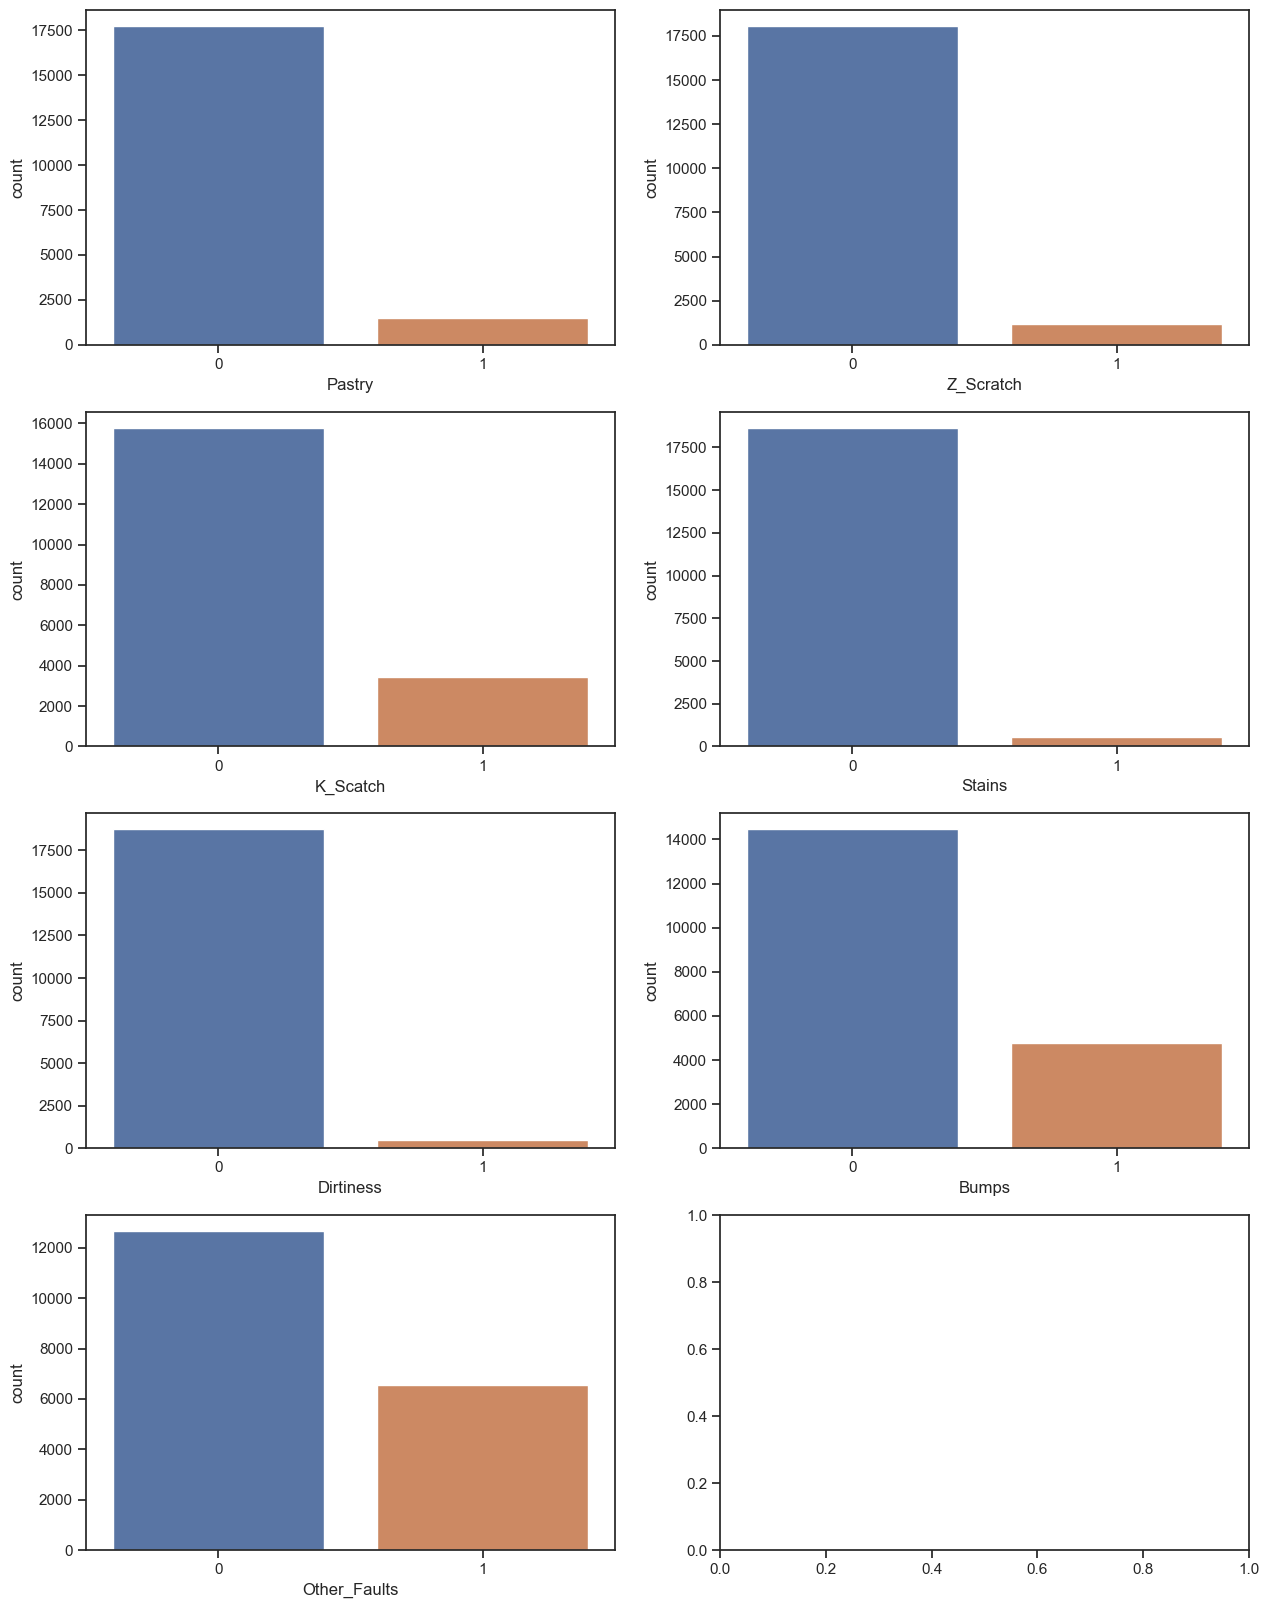

In [126]:
sns.set(style="ticks", color_codes=True)
fig, axes = plt.subplots(nrows = 4,ncols = 2,figsize = (15,20))

sns.countplot(x = "Pastry", data = train_df, ax=axes[0][0])
sns.countplot(x = "Z_Scratch", data = train_df, ax=axes[0][1])
sns.countplot(x = "K_Scatch", data = train_df, ax=axes[1][0])
sns.countplot(x = "Stains", data = train_df, ax=axes[1][1])
sns.countplot(x = "Dirtiness", data = train_df, ax=axes[2][0])
sns.countplot(x = "Bumps", data = train_df, ax=axes[2][1])
sns.countplot(x = "Other_Faults", data = train_df, ax=axes[3][0])



* ### Independent Variables  

In [127]:
features = [col for col in train_df.columns if col not in ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']]

In [128]:
features

['X_Minimum',
 'X_Maximum',
 'Y_Minimum',
 'Y_Maximum',
 'Pixels_Areas',
 'X_Perimeter',
 'Y_Perimeter',
 'Sum_of_Luminosity',
 'Minimum_of_Luminosity',
 'Maximum_of_Luminosity',
 'Length_of_Conveyer',
 'TypeOfSteel_A300',
 'TypeOfSteel_A400',
 'Steel_Plate_Thickness',
 'Edges_Index',
 'Empty_Index',
 'Square_Index',
 'Outside_X_Index',
 'Edges_X_Index',
 'Edges_Y_Index',
 'Outside_Global_Index',
 'LogOfAreas',
 'Log_X_Index',
 'Log_Y_Index',
 'Orientation_Index',
 'Luminosity_Index',
 'SigmoidOfAreas']

In [129]:
train_df.describe().T.style.background_gradient(cmap = sns.color_palette("ch:s=-.3,r=.2", as_cmap=True))

,count,mean,std,min,25%,50%,75%,max
X_Minimum,19219.000000,709.854675,531.544189,0.000000,49.000000,777.000000,1152.000000,1705.000000
X_Maximum,19219.000000,753.857641,499.836603,4.000000,214.000000,796.000000,1165.000000,1713.000000
Y_Minimum,19219.000000,1849756.040012,1903553.850679,6712.000000,657468.000000,1398169.000000,2368032.000000,12987661.000000
Y_Maximum,19219.000000,1846605.345439,1896295.137914,6724.000000,657502.000000,1398179.000000,2362511.000000,12987692.000000
Pixels_Areas,19219.000000,1683.987616,3730.319865,6.000000,89.000000,168.000000,653.000000,152655.000000
X_Perimeter,19219.000000,95.654665,177.821382,2.000000,15.000000,25.000000,64.000000,7553.000000
Y_Perimeter,19219.000000,64.124096,101.054178,1.000000,14.000000,23.000000,61.000000,903.000000
Sum_of_Luminosity,19219.000000,191846.678235,442024.694057,250.000000,9848.000000,18238.000000,67978.000000,11591414.000000
Minimum_of_Luminosity,19219.000000,84.808419,28.800344,0.000000,70.000000,90.000000,105.000000,196.000000
Maximum_of_Luminosity,19219.000000,128.647380,14.196976,39.000000,124.000000,127.000000,135.000000,253.000000


* ### Distribution of the Features 

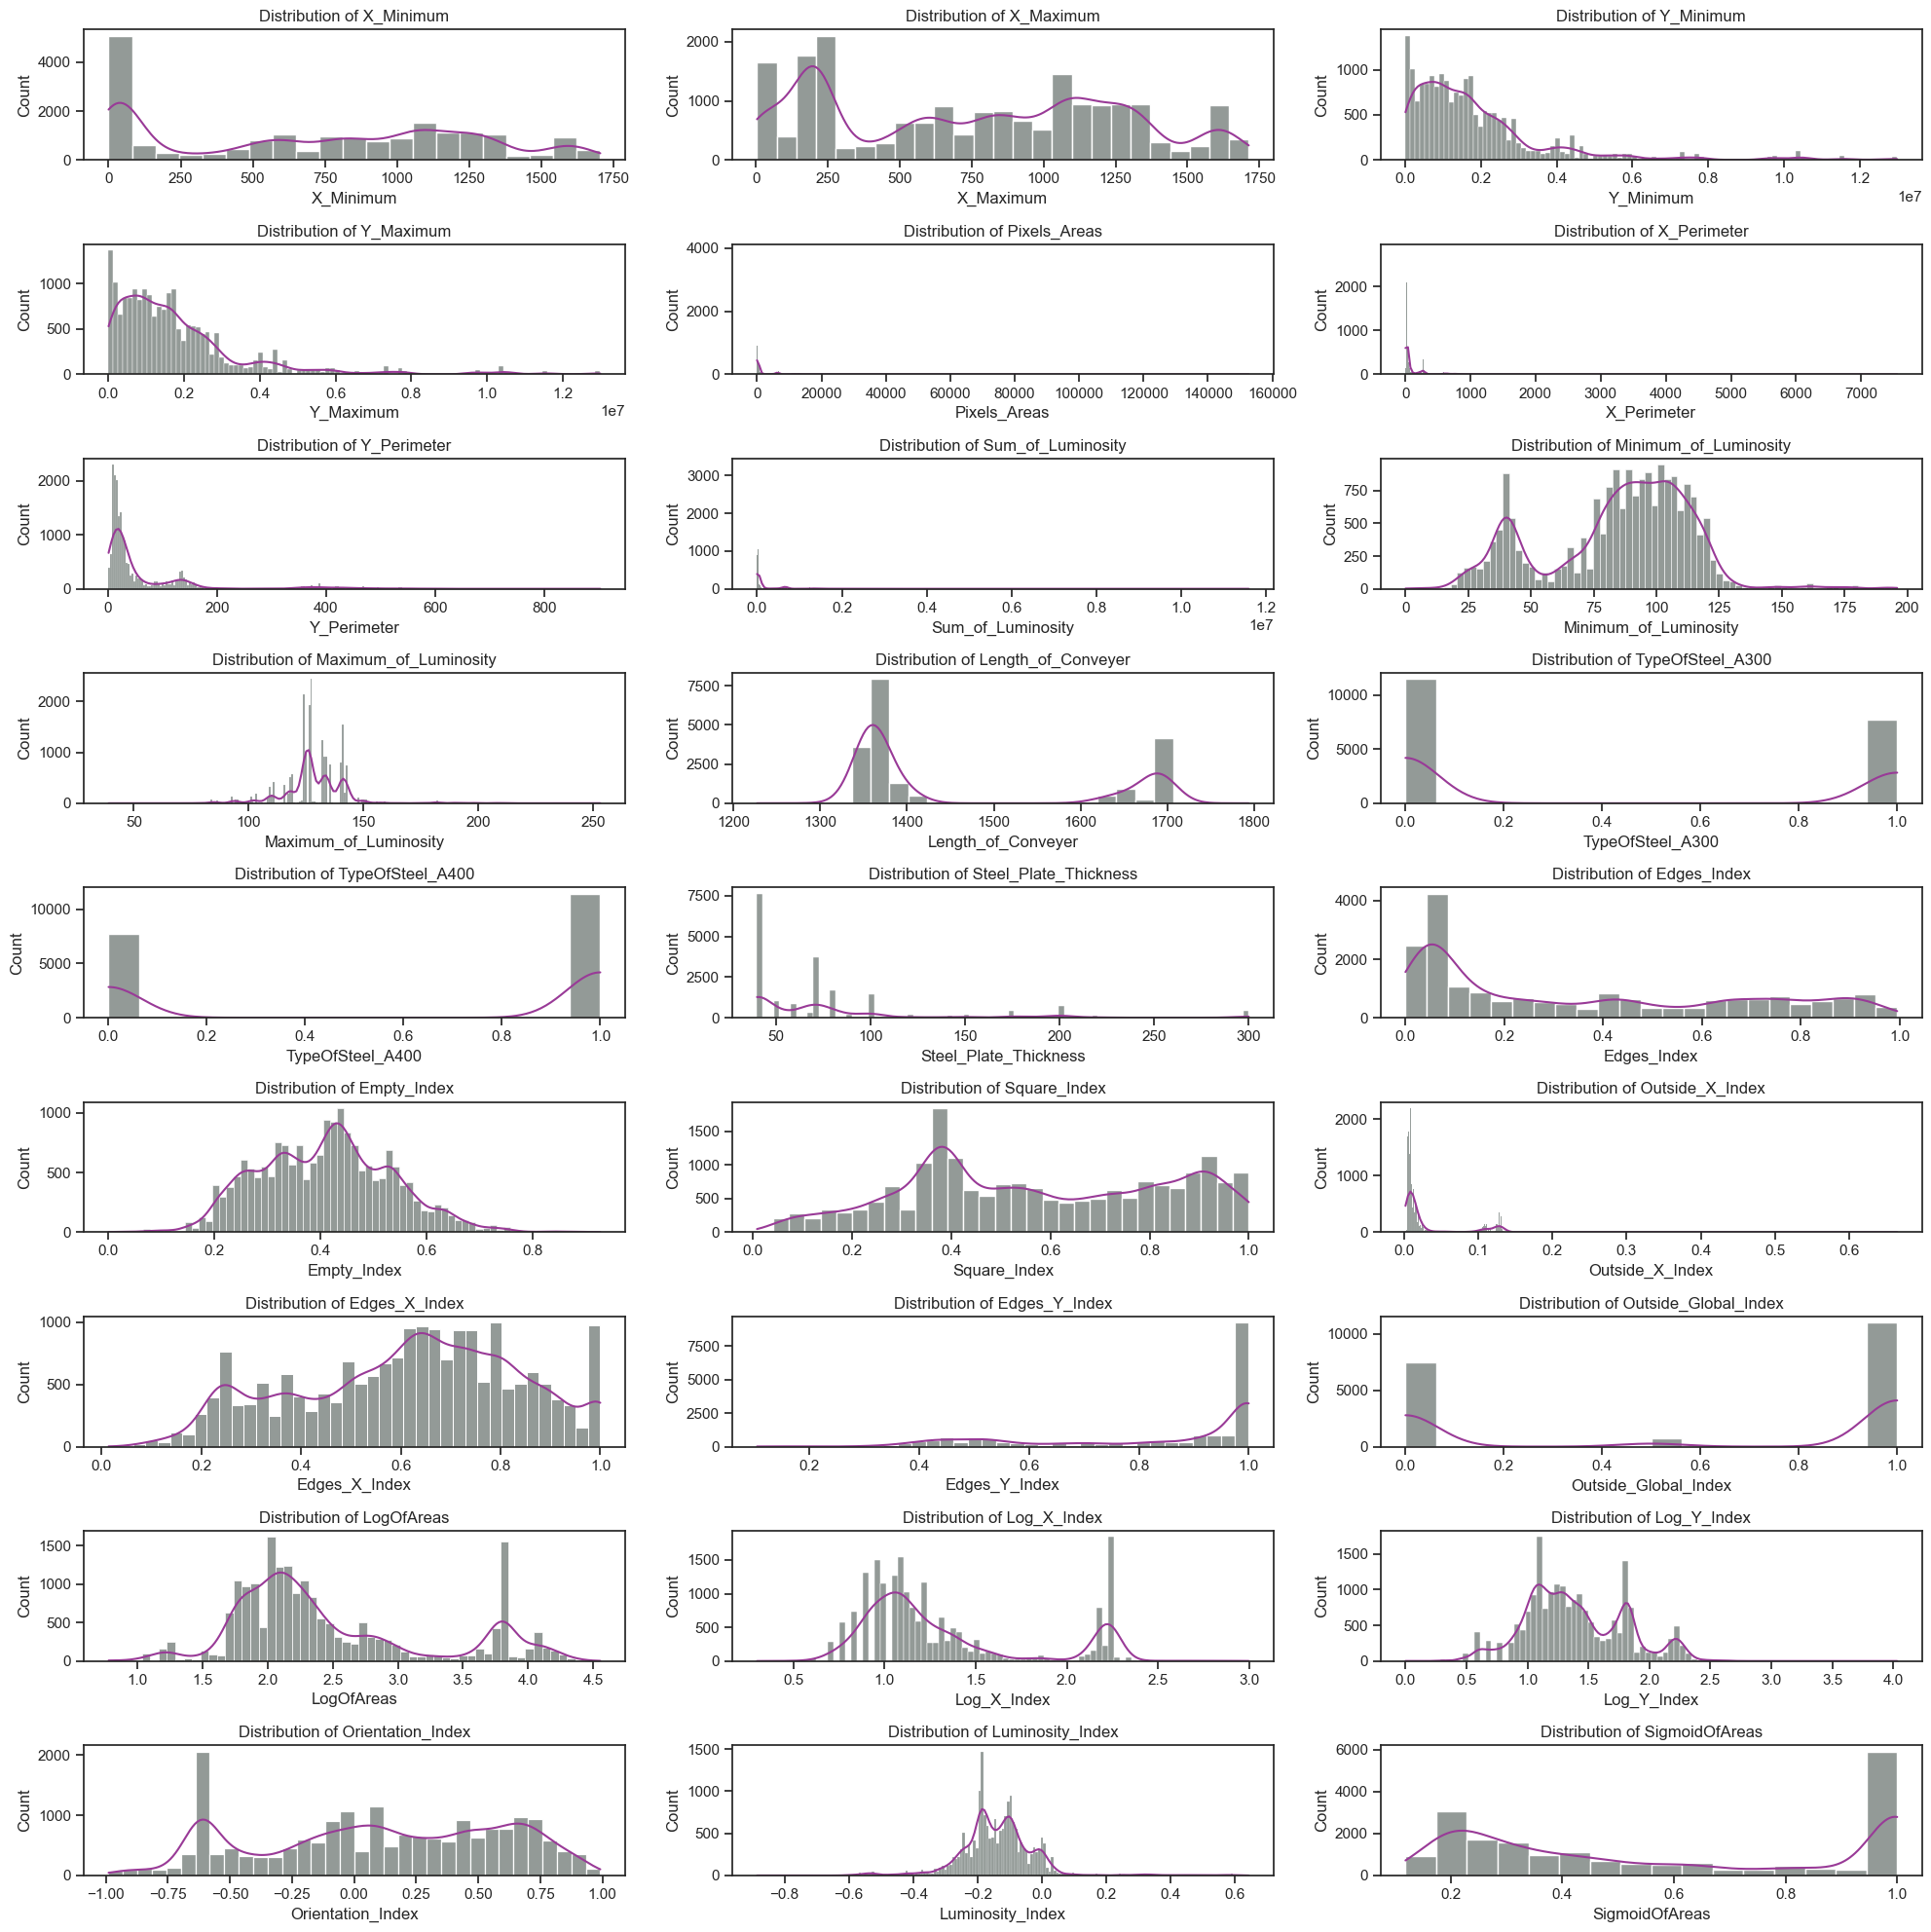

In [130]:
# Distribution of the features 
## Set a 6x3 subplots 
fig_rows = 9
fig_cols = 3
fig, axes = plt.subplots(fig_rows, fig_cols, figsize=(20, 20))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.histplot(data=train_df, x=feature, color='#293630', kde=True, ax=axes[i])
    axes[i].get_lines()[0].set_color('#993a97')
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
    
# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()





# Data split into test and training 

In [132]:
# Data split into test and training 

X = train_df.drop(['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults'], axis=1)
y = train_df[['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Features Selection Using Pearson Correlation


In [133]:
# Checking Multicollinearity

Corr_Independent_variables= X_train.corr()
Corr_Independent_features



,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
X_Minimum,1.000000,0.989750,0.024878,0.023444,-0.461668,-0.441675,-0.422086,-0.424508,0.337806,-0.126633,...,-0.512987,0.109955,0.455908,0.220594,-0.500822,-0.525778,-0.370908,0.275529,-0.066155,-0.370576
X_Maximum,0.989750,1.000000,0.027545,0.025317,-0.387930,-0.367128,-0.349815,-0.356003,0.274726,-0.123569,...,-0.420813,0.092212,0.385969,0.187920,-0.423517,-0.442091,-0.310996,0.234839,-0.077055,-0.312077
Y_Minimum,0.024878,0.027545,1.000000,0.969755,-0.009240,-0.016109,-0.025150,-0.009043,-0.021773,-0.037232,...,0.014861,0.056019,0.001008,-0.022368,-0.004051,0.009899,-0.022390,-0.038413,-0.031133,-0.032927
Y_Maximum,0.023444,0.025317,0.969755,1.000000,-0.009513,-0.016311,-0.025427,-0.009145,-0.021357,-0.033951,...,0.011086,0.054563,0.002775,-0.019392,-0.003759,0.009850,-0.022148,-0.036093,-0.028003,-0.032380
Pixels_Areas,-0.461668,-0.387930,-0.009240,-0.009513,1.000000,0.823741,0.837455,0.797657,-0.623783,0.127114,...,0.762987,-0.302487,-0.654850,-0.215078,0.775656,0.750791,0.643434,-0.273840,-0.015777,0.543559
X_Perimeter,-0.441675,-0.367128,-0.016109,-0.016311,0.823741,1.000000,0.902392,0.784757,-0.594724,0.153545,...,0.741850,-0.374508,-0.658359,-0.177713,0.760422,0.740293,0.658754,-0.235925,0.005024,0.552444
Y_Perimeter,-0.422086,-0.349815,-0.025150,-0.025427,0.837455,0.902392,1.000000,0.803626,-0.604352,0.159180,...,0.701325,-0.468564,-0.616361,-0.089721,0.790588,0.706541,0.760192,-0.120035,-0.006254,0.607258
Sum_of_Luminosity,-0.424508,-0.356003,-0.009043,-0.009145,0.797657,0.784757,0.803626,1.000000,-0.577480,0.125147,...,0.698342,-0.311875,-0.609146,-0.182156,0.721583,0.693524,0.611294,-0.238006,-0.015255,0.515483
Minimum_of_Luminosity,0.337806,0.274726,-0.021773,-0.021357,-0.623783,-0.594724,-0.604352,-0.577480,1.000000,0.393507,...,-0.633069,0.235287,0.467928,0.118135,-0.692935,-0.638662,-0.588848,0.181854,0.618137,-0.505839
Maximum_of_Luminosity,-0.126633,-0.123569,-0.037232,-0.033951,0.127114,0.153545,0.159180,0.125147,0.393507,1.000000,...,0.070778,-0.014188,-0.152530,-0.116604,0.030874,0.076370,0.004239,-0.109817,0.848267,0.017362


<function matplotlib.pyplot.show(close=None, block=None)>

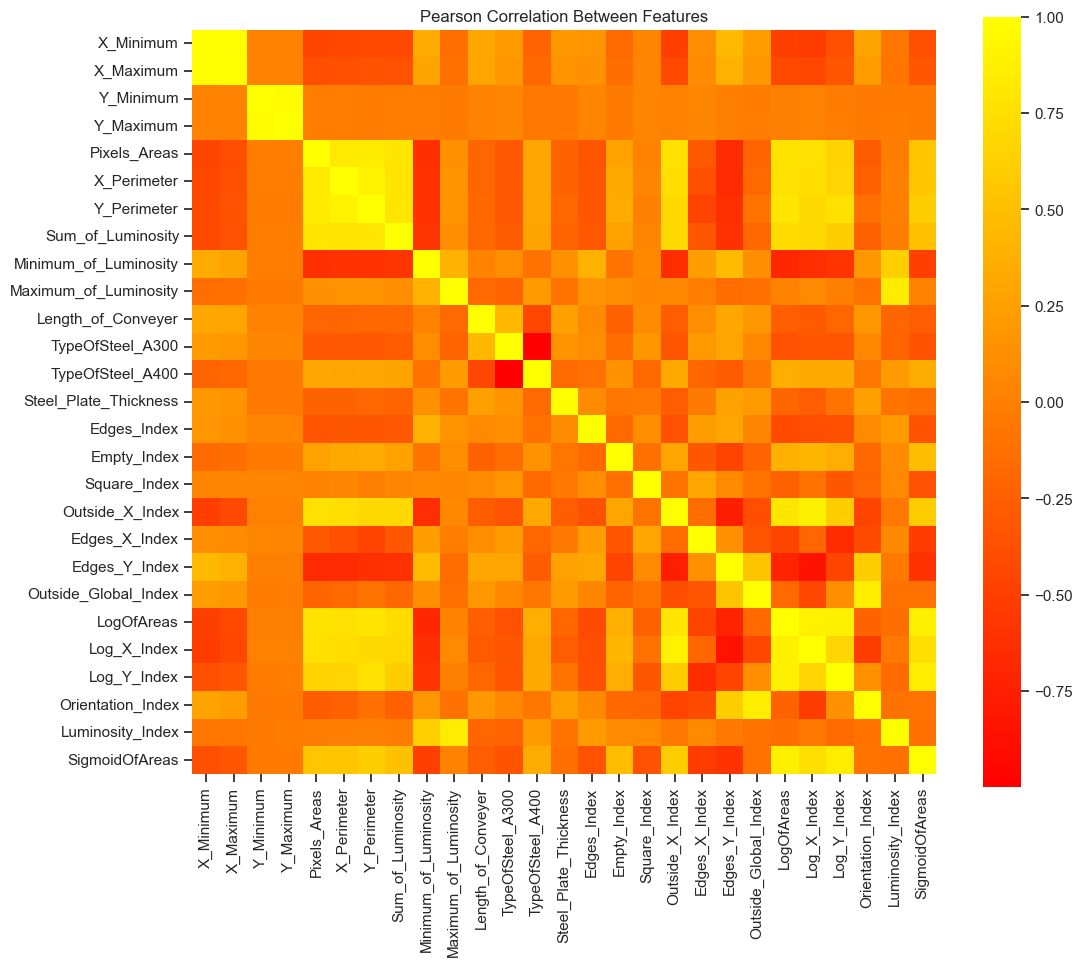

In [134]:
plt.figure(figsize =(12,10))
sns.heatmap (Corr_Independent_variables, annot =False, cmap =plt.cm.autumn, square=True)
plt.title("Pearson Correlation Between Features")
plt.show

In [135]:
# Below code is taking from https://github.com/krishnaik06/Complete-Feature-Selection/blob/master/2-Feature%20Selection-%20Correlation.ipynb

In [136]:
# Extracting highly correlated features
def correlation(data, threshold):
    column_correlation = set()
    correlation_matrix = data.corr()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                column_name = correlation_matrix.columns[i]
                column_correlation.add(column_name)
    return column_correlation

In [137]:
highly_correlated_features = correlation(X_train, 0.7)
highly_correlated_features

{'Edges_Y_Index',
 'LogOfAreas',
 'Log_X_Index',
 'Log_Y_Index',
 'Luminosity_Index',
 'Orientation_Index',
 'Outside_X_Index',
 'SigmoidOfAreas',
 'Sum_of_Luminosity',
 'TypeOfSteel_A400',
 'X_Maximum',
 'X_Perimeter',
 'Y_Maximum',
 'Y_Perimeter'}

In [138]:
#Drop Hightly correlated features ( correlation > 0.7) 
X_train.drop(highly_correlated_features, axis =1, inplace=True)
X_test.drop(highly_correlated_features, axis =1, inplace=True)
test_df.drop(highly_correlated_features, axis =1, inplace=True)

In [139]:
X_train.shape, X_test.shape,test_df.shape

((14414, 13), (4805, 13), (12814, 13))

# Standardizing or Normalizing features 

In [140]:
#from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized= scaler.transform(X_test)
test_df_standardized= scaler.transform(test_df)

# Model Training and Deploying 

* ### RandomForestClassifier

In [141]:
Randomforest = RandomForestClassifier(n_estimators=10, random_state=1)
rf = MultiOutputClassifier(Randomforest, n_jobs=-1)
rf.fit(X_train_standardized, y_train)
prob_predictions = rf.predict_proba(test_df_standardized)



* ### Catboost

In [142]:
catboost_classifier = CatBoostClassifier()
cb_model = MultiOutputClassifier(catboost_classifier, 
                                                  n_jobs=-1)

cb_model.fit(X_train_standardized, y_train)
cb_pred = cb_model.predict_proba(test_df_standardized)
cb_pred 

[array([[6.76155797e-01, 3.23844203e-01],
        [8.42327967e-01, 1.57672033e-01],
        [9.99162840e-01, 8.37160182e-04],
        ...,
        [9.99974915e-01, 2.50849951e-05],
        [8.13620799e-01, 1.86379201e-01],
        [9.99303997e-01, 6.96003484e-04]]),
 array([[9.98641216e-01, 1.35878387e-03],
        [9.73179373e-01, 2.68206267e-02],
        [9.01467770e-01, 9.85322300e-02],
        ...,
        [9.99943563e-01, 5.64373406e-05],
        [9.99123098e-01, 8.76901753e-04],
        [9.90953787e-01, 9.04621268e-03]]),
 array([[0.99715567, 0.00284433],
        [0.99186762, 0.00813238],
        [0.97958161, 0.02041839],
        ...,
        [0.09238277, 0.90761723],
        [0.99528506, 0.00471494],
        [0.07670443, 0.92329557]]),
 array([[9.99983060e-01, 1.69398466e-05],
        [9.99971361e-01, 2.86391131e-05],
        [9.99709565e-01, 2.90434813e-04],
        ...,
        [9.99990806e-01, 9.19426505e-06],
        [9.99985816e-01, 1.41839145e-05],
        [9.99981824e-01,

# Submission 

In [148]:
y_preds = [subarray[:, 1] for subarray in cb_pred]

for value,row in enumerate(y_preds):
    submission_df[target_variables[value]] = row


In [149]:
submission_df.head()

,id,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,19219,0.323844,0.001359,0.002844,0.000017,0.062213,0.108991,0.431370
1,19220,0.157672,0.026821,0.008132,0.000029,0.082834,0.129074,0.385492
2,19221,0.000837,0.098532,0.020418,0.000290,0.007768,0.172710,0.422043
3,19222,0.063215,0.000380,0.000042,0.000252,0.010018,0.415623,0.450743
4,19223,0.017347,0.000225,0.000069,0.000443,0.001943,0.629842,0.313618


In [151]:
submission_df.to_csv('SPD_test_pred_fu5452.csv', index=False)